In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from scipy import optimize
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import ScalarFormatter
from adjustText import adjust_text

In [2]:
# For plot settings

from pylab import *

fig_width_pt = 469.75499                # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt * inches_per_pt  # width in inches
fig_height = fig_width * golden_mean * 1.1   # height in inches
fig_size =  [fig_width,fig_height]

params = {'backend': 'pdf',
          'axes.linewidth': 1.5,
          'axes.spines.top': False,
          'axes.spines.right': False,
          'axes.labelsize': 16,
          'font.size': 14,
          'legend.fontsize': 14,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'lines.dash_joinstyle' : 'round',
          'lines.dash_capstyle' : 'round',
          'lines.solid_joinstyle' : 'round',
          'lines.solid_capstyle' : 'round',
          'text.usetex': False,
          'mathtext.fontset' : 'stixsans',
          'mathtext.default' : 'rm',
          'xtick.direction' : 'in',
          'ytick.direction' : 'in',
          'xtick.top' : False,
          'ytick.right' : False,
          'xtick.minor.visible': True,
          'ytick.minor.visible': True,
          'figure.figsize': fig_size}

rcParams.update(params)

In [3]:
savedir = "/Users/thepoetoftwilight/Documents/SOFIA_FIFI_Cycle-8/Data/Processed/"
df = pd.read_csv(savedir + "emission_line_database.csv")

In [4]:
df.dtypes

Galaxy                                     object
RA                                         object
DEC                                        object
Redshift                                  float64
Sp                                         object
Z (Zsun)                                  float64
eZ                                        float64
PlanID                                     object
PI                                         object
SOFIA                                      object
cent_o3_52 (micron)                       float64
PI.1                                       object
AOR_ID                                     object
Mission_ID                                 object
Exposure Time (s)                         float64
o3_52_cont (1e-15 W/m^2/micron)           float64
err_52_cont (1e-15 W/m^2/micron)          float64
o3_52_cont_flux (1e-17 W/m^2)             float64
err_52_cont_flux (1e-17 W/m^2)            float64
o3_52 (1e-17 W/m^2)                       float64


In [5]:
df["o3_52_cont (1e-15 W/m^2/micron)"] = pd.to_numeric(df["o3_52_cont (1e-15 W/m^2/micron)"] , errors = "coerce")
df["err_52_cont (1e-15 W/m^2/micron)"] = pd.to_numeric(df["err_52_cont (1e-15 W/m^2/micron)"], errors = "coerce")

df["o3_52_cont_flux (1e-17 W/m^2)"] = pd.to_numeric(df["o3_52_cont_flux (1e-17 W/m^2)"] , errors = "coerce")
df["err_52_cont_flux (1e-17 W/m^2)"] = pd.to_numeric(df["err_52_cont_flux (1e-17 W/m^2)"], errors = "coerce")

df["o3_52 (1e-17 W/m^2)"] = pd.to_numeric(df["o3_52 (1e-17 W/m^2)"] , errors = "coerce")
df["err_52 (1e-17 W/m^2)"] = pd.to_numeric(df["err_52 (1e-17 W/m^2)"] , errors = "coerce")

df["o3_52 (1e-17 W/m^2) (from literature)"] = pd.to_numeric(df["o3_52 (1e-17 W/m^2) (from literature)"] , errors = "coerce")
df["err_52 (1e-17 W/m^2) (from literature)"] = pd.to_numeric(df["err_52 (1e-17 W/m^2) (from literature)"] , errors = "coerce")

df["n3_57_cont (1e-15 W/m^2/micron)"] = pd.to_numeric(df["n3_57_cont (1e-15 W/m^2/micron)"] , errors = "coerce")
df["err_57_cont (1e-15 W/m^2/micron)"] = pd.to_numeric(df["err_57_cont (1e-15 W/m^2/micron)"], errors = "coerce")

df["n3_57_cont_flux (1e-17 W/m^2)"] = pd.to_numeric(df["n3_57_cont_flux (1e-17 W/m^2)"] , errors = "coerce")
df["err_57_cont_flux (1e-17 W/m^2)"] = pd.to_numeric(df["err_57_cont_flux (1e-17 W/m^2)"], errors = "coerce")

df["n3_57 (1e-17 W/m^2)"] = pd.to_numeric(df["n3_57 (1e-17 W/m^2)"] , errors = "coerce")
df["err_57 (1e-17 W/m^2)"] = pd.to_numeric(df["err_57 (1e-17 W/m^2)"] , errors = "coerce")

df["n3_57 (1e-17 W/m^2) (from literature)"] = pd.to_numeric(df["n3_57 (1e-17 W/m^2) (from literature)"] , errors = "coerce")
df["err_57 (1e-17 W/m^2) (from literature)"] = pd.to_numeric(df["err_57 (1e-17 W/m^2) (from literature)"] , errors = "coerce")

df["o3_88 (1e-17 W/m^2) (from literature)"] = pd.to_numeric(df["o3_88 (1e-17 W/m^2) (from literature)"] , errors = "coerce")
df["err_88 (1e-17 W/m^2) (from literature)"] = pd.to_numeric(df["err_88 (1e-17 W/m^2) (from literature)"] , errors = "coerce")

In [6]:
df.dtypes

Galaxy                                     object
RA                                         object
DEC                                        object
Redshift                                  float64
Sp                                         object
Z (Zsun)                                  float64
eZ                                        float64
PlanID                                     object
PI                                         object
SOFIA                                      object
cent_o3_52 (micron)                       float64
PI.1                                       object
AOR_ID                                     object
Mission_ID                                 object
Exposure Time (s)                         float64
o3_52_cont (1e-15 W/m^2/micron)           float64
err_52_cont (1e-15 W/m^2/micron)          float64
o3_52_cont_flux (1e-17 W/m^2)             float64
err_52_cont_flux (1e-17 W/m^2)            float64
o3_52 (1e-17 W/m^2)                       float64


In [7]:
df

,Galaxy,RA,DEC,Redshift,Sp,Z (Zsun),eZ,PlanID,PI,SOFIA,...,err_57_cont (1e-15 W/m^2/micron),n3_57_cont_flux (1e-17 W/m^2),err_57_cont_flux (1e-17 W/m^2),n3_57 (1e-17 W/m^2),err_57 (1e-17 W/m^2),n3_57 (1e-17 W/m^2) (from literature),err_57 (1e-17 W/m^2) (from literature),cent_o3_88 (micron),o3_88 (1e-17 W/m^2) (from literature),err_88 (1e-17 W/m^2) (from literature)
0,NGC253,00h47m33.0727s,-25d17m18.9960s,0.000811,HII,0.720000,0.300,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,599.54,178.33,88.43,625.21,53.54
1,MCG+12-02-001,00h54m03.6s,+73d05m12s,0.015698,ULIRG,NaN,NaN,07_0209,G. Stacey,"o3_52,n3_57",...,1.23,225.84,66.08,62.58,24.76,52.90,15.30,89.75,234.00,24.00
2,NGC1068,02h42m40.7071s,-00d00m48.0204s,0.003793,S1h,0.890000,0.040,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,443.65,41.95,88.70,634.33,19.71
3,NGC1365,03h33m36.3828s,-36d08m25.7136s,0.005457,S1.8,0.890000,0.040,05_0111,G. Stacey,o3_52,...,NaN,NaN,NaN,NaN,NaN,131.59,16.71,88.84,200.31,8.10
4,IC342,03h46m48.4764s,+68d05m46.892s,0.000103,HII,1.400000,0.100,03_0135,K. Croxall,o3_52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.37,171.14,7.92
5,NGC1569,04h30m49.0253s,+64d50m52.8792s,-0.000347,Dwarf,0.210000,0.010,"70_0408,07_0048","A. Krabbe, J. Spilker","o3_52,n3_57",...,0.24,132.17,5.19,40.30,9.77,NaN,NaN,88.33,2800.00,10.00
6,NGC1614,04h34m00.0278s,-08d34m44.994s,0.015938,HII,1.000000,0.260,07_0209,G. Stacey,"o3_52,n3_57",...,0.09,732.75,13.10,46.81,6.61,NaN,NaN,89.77,192.97,12.08
7,NGC1808,05h07m42.3377s,-37d30m45.9216s,0.003319,HII,2.570000,0.000,05_0111,G. Stacey,o3_52,...,NaN,NaN,NaN,NaN,NaN,152.62,10.79,88.65,204.38,11.04
8,IIZw40,05h55m42.6259s,+03d23m31.7076s,0.002632,Dwarf,0.347000,0.008,06_0225,G. Stacey,"o3_52,n3_57",...,0.49,20.33,0.27,11.09,4.01,55.10,40.00,88.59,359.00,4.00
9,Mrk3,06h15m36.4104s,+71d02m14.9388s,0.013509,S1h,1.150000,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,19.64,3.93,89.55,58.49,2.94


In [8]:
names = df["Galaxy"]

Z = np.array(df["Z (Zsun)"])

cont_o3_52 = np.array(df["o3_52_cont (1e-15 W/m^2/micron)"])
cont_err_52 = np.array(df["err_52_cont (1e-15 W/m^2/micron)"])

o3_52_cont_flux = np.array(df["o3_52_cont_flux (1e-17 W/m^2)"])
err_52_cont_flux = np.array(df["err_52_cont_flux (1e-17 W/m^2)"])

o3_52 = np.array(df["o3_52 (1e-17 W/m^2)"])
err_52 = np.array(df["err_52 (1e-17 W/m^2)"])

o3_52_other = np.array(df["o3_52 (1e-17 W/m^2) (from literature)"])
err_52_other = np.array(df["err_52 (1e-17 W/m^2) (from literature)"])

cont_n3_57 = np.array(df["n3_57_cont (1e-15 W/m^2/micron)"])
cont_err_57 = np.array(df["err_57_cont (1e-15 W/m^2/micron)"])

n3_57_cont_flux = np.array(df["n3_57_cont_flux (1e-17 W/m^2)"])
err_57_cont_flux = np.array(df["err_57_cont_flux (1e-17 W/m^2)"])

n3_57 = np.array(df["n3_57 (1e-17 W/m^2)"])
err_57 = np.array(df["err_57 (1e-17 W/m^2)"])

n3_57_other = np.array(df["n3_57 (1e-17 W/m^2) (from literature)"])
err_57_other = np.array(df["err_57 (1e-17 W/m^2) (from literature)"])

o3_88_other = np.array(df["o3_88 (1e-17 W/m^2) (from literature)"])
err_88_other = np.array(df["err_88 (1e-17 W/m^2) (from literature)"])

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

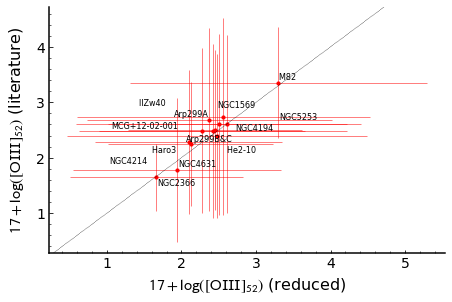

In [9]:
figure(1)
clf()
ax = gca()

ax.scatter(np.log10(o3_52), np.log10(o3_52_other), s = 10, color = 'red')
ax.errorbar(np.log10(o3_52), np.log10(o3_52_other), np.log10(err_52_other), np.log10(err_52), 
            elinewidth = 0.5, color = 'red', ls = 'None')

xpoints = ypoints = ax.get_xlim()
ax.plot(xpoints, ypoints, color='k', lw=0.5, linestyle = ':', scalex=False, scaley=False)

ax.set_xlabel(r'$17 + \log \left( [OIII]_{52} \right)$ (reduced)', labelpad = 5)
ax.set_ylabel(r'$17 + \log \left( [OIII]_{52} \right)$ (literature)', labelpad = 10)

texts = []
for i, txt in enumerate(names):
    texts.append(ax.text(np.log10(o3_52[i]), np.log10(o3_52_other[i]), txt, fontsize = 8))
adjust_text(texts)

draw()
tight_layout()
savefig(savedir + 'diagnostic-00.pdf', dpi = 300, transparent = True)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

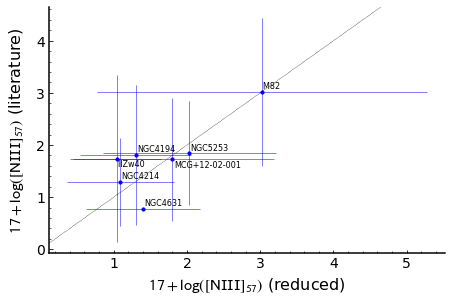

In [10]:
figure(1)
clf()
ax = gca()

ax.scatter(np.log10(n3_57), np.log10(n3_57_other), s = 10, color = 'blue')
ax.errorbar(np.log10(n3_57), np.log10(n3_57_other), np.log10(err_57_other), np.log10(err_57), 
            elinewidth = 0.5, color = 'blue', ls = 'None')

xpoints = ypoints = ax.get_xlim()
ax.plot(xpoints, ypoints, color='k', lw=0.5, linestyle = ':', scalex=False, scaley=False)

ax.set_xlabel(r'$17 + \log \left( [NIII]_{57} \right)$ (reduced)', labelpad = 5)
ax.set_ylabel(r'$17 + \log \left( [NIII]_{57} \right)$ (literature)', labelpad = 10)

texts = []
for i, txt in enumerate(names):
    texts.append(ax.text(np.log10(n3_57[i]), np.log10(n3_57_other[i]), txt, fontsize = 8))
adjust_text(texts)

draw()
tight_layout()
savefig(savedir + 'diagnostic-01.pdf', dpi = 300, transparent = True)

<ipython-input-11-1a1684572449>:5: RuntimeWarning: invalid value encountered in log10
  ax.scatter(np.log10(cont_o3_52), np.log10(o3_52), s = 10, color = 'red')
<ipython-input-11-1a1684572449>:6: RuntimeWarning: invalid value encountered in log10
  ax.errorbar(np.log10(cont_o3_52), np.log10(o3_52), np.log10(err_52), np.log10(cont_err_52),
<ipython-input-11-1a1684572449>:17: RuntimeWarning: invalid value encountered in log10
  texts.append(ax.text(np.log10(cont_o3_52[i]), np.log10(o3_52[i]), txt, fontsize = 8))
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be fini

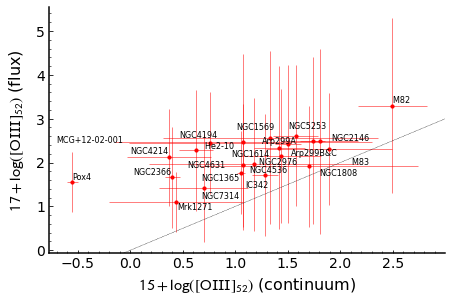

In [11]:
figure(1)
clf()
ax = gca()

ax.scatter(np.log10(cont_o3_52), np.log10(o3_52), s = 10, color = 'red')
ax.errorbar(np.log10(cont_o3_52), np.log10(o3_52), np.log10(err_52), np.log10(cont_err_52), 
            elinewidth = 0.5, color = 'red', ls = 'None')

xpoints = ypoints = ax.get_xlim()
ax.plot(xpoints, ypoints, color='k', lw=0.5, linestyle = ':', scalex=False, scaley=False)

ax.set_xlabel(r'$15 + \log \left( [OIII]_{52} \right)$ (continuum)', labelpad = 5)
ax.set_ylabel(r'$17 + \log \left( [OIII]_{52} \right)$ (flux)', labelpad = 10)

texts = []
for i, txt in enumerate(names):
    texts.append(ax.text(np.log10(cont_o3_52[i]), np.log10(o3_52[i]), txt, fontsize = 8))
adjust_text(texts)

draw()
tight_layout()
savefig(savedir + 'diagnostic-02.pdf', dpi = 300, transparent = True)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

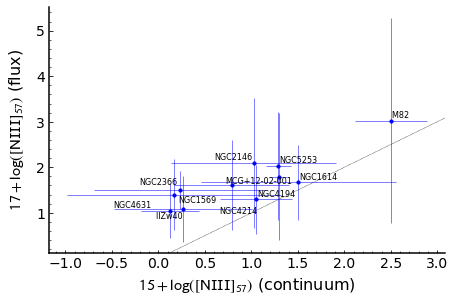

In [12]:
figure(1)
clf()
ax = gca()

ax.scatter(np.log10(cont_n3_57), np.log10(n3_57), s = 10, color = 'blue')
ax.errorbar(np.log10(cont_n3_57), np.log10(n3_57), np.log10(err_57), np.log10(cont_err_57), 
            elinewidth = 0.5, color = 'blue', ls = 'None')

xpoints = ypoints = ax.get_xlim()
ax.plot(xpoints, ypoints, color='k', lw=0.5, linestyle = ':', scalex=False, scaley=False)

ax.set_xlabel(r'$15 + \log \left( [NIII]_{57} \right)$ (continuum)', labelpad = 5)
ax.set_ylabel(r'$17 + \log \left( [NIII]_{57} \right)$ (flux)', labelpad = 10)

texts = []
for i, txt in enumerate(names):
    texts.append(ax.text(np.log10(cont_n3_57[i]), np.log10(n3_57[i]), txt, fontsize = 8))
adjust_text(texts)

draw()
tight_layout()
savefig(savedir + 'diagnostic-03.pdf', dpi = 300, transparent = True)

<ipython-input-9-5776ea7d41ab>:5: RuntimeWarning: invalid value encountered in log10
  ax.scatter(np.log10(cont_o3_52), np.log10(cont_n3_57), s = 10, color = 'green')
<ipython-input-9-5776ea7d41ab>:6: RuntimeWarning: invalid value encountered in log10
  ax.errorbar(np.log10(cont_o3_52), np.log10(cont_n3_57),
<ipython-input-9-5776ea7d41ab>:18: RuntimeWarning: invalid value encountered in log10
  texts.append(ax.text(np.log10(cont_o3_52[i]), np.log10(cont_n3_57[i]), txt, fontsize = 8))
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy sho

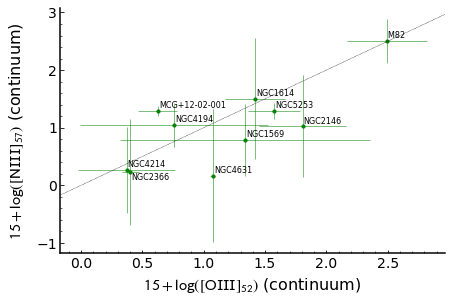

In [9]:
figure(1)
clf()
ax = gca()

ax.scatter(np.log10(cont_o3_52), np.log10(cont_n3_57), s = 10, color = 'green')
ax.errorbar(np.log10(cont_o3_52), np.log10(cont_n3_57), 
            np.log10(cont_err_57), np.log10(cont_err_52),  
            elinewidth = 0.5, color = 'green', ls = 'None')

xpoints = ypoints = ax.get_xlim()
ax.plot(xpoints, ypoints, color='k', lw=0.5, linestyle = ':', scalex=False, scaley=False)

ax.set_xlabel(r'$15 + \log \left( [OIII]_{52} \right)$ (continuum)', labelpad = 5)
ax.set_ylabel(r'$15 + \log \left( [NIII]_{57} \right)$ (continuum)', labelpad = 10)

texts = []
for i, txt in enumerate(names):
    texts.append(ax.text(np.log10(cont_o3_52[i]), np.log10(cont_n3_57[i]), txt, fontsize = 8))
adjust_text(texts)

draw()
tight_layout()
savefig(savedir + 'diagnostic-04.pdf', dpi = 300, transparent = True)